<a href="https://colab.research.google.com/github/Priyanka-code-sys/Thesis_Priyanka/blob/main/tranformers_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
!wget https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_multilingual_UK_v1_00.tsv.gz
!wget https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_multilingual_FR_v1_00.tsv.gz

--2021-12-15 12:06:11--  https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_multilingual_UK_v1_00.tsv.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.110.190
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.110.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 349370868 (333M) [application/x-gzip]
Saving to: ‘amazon_reviews_multilingual_UK_v1_00.tsv.gz’

amazon_reviews_mult 100%[===================>] 333.19M  16.5MB/s    in 23s     

2021-12-15 12:06:35 (14.7 MB/s) - ‘amazon_reviews_multilingual_UK_v1_00.tsv.gz’ saved [349370868/349370868]

--2021-12-15 12:06:35--  https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_multilingual_FR_v1_00.tsv.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.71.54
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.71.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70583516 (67M) [application/x-gzip]
Saving to: ‘amazon_reviews_multilingual_FR

In [3]:
#load the pandas dataframe
data_uk = pd.read_csv('amazon_reviews_multilingual_UK_v1_00.tsv.gz',delimiter = '\t', quoting = 3)
data_france = pd.read_csv('amazon_reviews_multilingual_FR_v1_00.tsv.gz',delimiter = '\t', quoting = 3)

In [4]:
data_uk.head(2)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,UK,10349,R2YVNBBMXD8KVJ,B00MWK7BWG,307651059,My Favourite Faded Fantasy,Music,5,0,0,N,Y,Five Stars,The best album ever!,2014-12-29
1,UK,10629,R2K4BOL8MN1TTY,B006CHML4I,835010224,Seiko 5 Men's Automatic Watch with Black Dial ...,Watches,4,0,0,N,Y,Great watch from casio.,What a great watch. Both watches and strap is ...,2013-10-24


In [5]:
data_france.head(2)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,FR,14952,R32VYUWDIB5LKE,0552774294,362925721,The God Delusion,Books,5,0,0,N,Y,a propos de ce livre,je conseille fortement ce bouquin à ceux qui s...,2013-02-13
1,FR,14952,R3CCMP4EV6HAVL,B004GJXQ20,268067011,"A Game of Thrones (A Song of Ice and Fire, Boo...",Digital_Ebook_Purchase,5,0,0,N,Y,wow,"ce magnifique est livre , les personnages sont...",2014-08-03


In [6]:
print("English Data Shape :: ",data_uk.shape)
print("French Data Shape :: ",data_france.shape)

English Data Shape ::  (1707494, 15)
French Data Shape ::  (254080, 15)


In [7]:
data_uk = data_uk.loc[:,['review_headline','review_body','star_rating']]
data_france = data_france.loc[:,['review_headline','review_body','star_rating']]

In [8]:
data_uk = shuffle(data_uk)
data_uk = data_uk[:250000]
data_france = shuffle(data_france)
data_france = data_france[:250000]

In [9]:
#combine the dataset into single dataset
data = pd.concat([data_uk,data_france])

In [10]:
data = shuffle(data)

In [11]:
data.head()

,review_headline,review_body,star_rating
631127,Great Book :),"This is actually a pretty funny read, Atticus,...",4
228875,defaut du coffret,Le film est bien la qualité aussi mais le coff...,3
498768,Brilliant,A brilliant film for all the fam<br />Great si...,5
64424,L'auteur d'Elantris tient ses promesses,C'est une histoire dans laquelle on entre aise...,5
69610,Très bon sac,J'ai remplacé un sac à dos pour portable 18&#3...,5


In [12]:
#combine the review heading and review body
data['review'] = data['review_headline'] + ' ' + data['review_body']
data = data.loc[:,['review','star_rating']]

In [13]:
data['review'] = data['review'].str.lower()

In [14]:
data.head()

,review,star_rating
631127,great book :) this is actually a pretty funny ...,4
228875,defaut du coffret le film est bien la qualité ...,3
498768,brilliant a brilliant film for all the fam<br ...,5
64424,l'auteur d'elantris tient ses promesses c'est ...,5
69610,très bon sac j'ai remplacé un sac à dos pour p...,5


In [15]:
data['review'] =data['review'].str.replace(r'[^a-zA-Z0-9\w\sàâäôéèëêïîçùûüÿæœÀÂÄÔÉÈËÊÏÎŸÇÙÛÜÆŒ]+',' ',regex=True)

In [16]:
data.head()

,review,star_rating
631127,great book this is actually a pretty funny r...,4
228875,defaut du coffret le film est bien la qualité ...,3
498768,brilliant a brilliant film for all the fam br ...,5
64424,l auteur d elantris tient ses promesses c est ...,5
69610,très bon sac j ai remplacé un sac à dos pour p...,5


In [17]:
#balance the number dataset for same number of review for each rating
df_five = data[data['star_rating']==5]
df_four = data[data['star_rating']==4]
df_three = data[data['star_rating']==3]
df_two = data[data['star_rating']==2]
df_one = data[data['star_rating']==1]

In [18]:
#get the length of each reviews
print(len(df_five.index))
print(len(df_four.index))
print(len(df_three.index))
print(len(df_two.index))
print(len(df_one.index))

318833
93408
41544
20376
25839


In [19]:
#taking 20k from each review
sample = 20000
data = pd.concat([df_five[:sample],df_four[:sample],df_three[:sample],df_two[:sample],df_one[:sample]])

In [20]:
#shuffle the dataset again
data = shuffle(data)
data.head()

,review,star_rating
1164509,broken dolls good suspense this was an interes...,3
185061,il faut rentrer dedans je me suis endormi au ...,3
100411,je conseille cette boite les enfants adorent ...,4
342888,not my favourite episode i have truly enjoyed ...,3
474857,five stars excelent,5


In [21]:
data.dropna(inplace=True)

In [22]:
data.shape

(25000, 2)

In [23]:
text = data.review.values
label = data.star_rating.values

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
oe_enc = OneHotEncoder()
label = oe_enc.fit_transform(np.array(label).reshape(-1,1)).toarray()

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(text,label,test_size=0.3)

# BERT

# BERT(Tensorflow)

In [27]:
!pip install -q -U tensorflow-text
!pip install -q tf-models-official
!pip install simpletransformers

     |████████████████████████████████| 4.9 MB 4.2 MB/s 
     |████████████████████████████████| 1.8 MB 4.5 MB/s 
     |████████████████████████████████| 213 kB 39.6 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 352 kB 48.3 MB/s 
     |████████████████████████████████| 99 kB 8.6 MB/s 
     |████████████████████████████████| 596 kB 52.2 MB/s 
     |████████████████████████████████| 90 kB 8.8 MB/s 
     |████████████████████████████████| 47.6 MB 91 kB/s 
     |████████████████████████████████| 1.2 MB 20.6 MB/s 
     |████████████████████████████████| 1.1 MB 48.0 MB/s 
     |████████████████████████████████| 247 kB 4.3 MB/s 
     |████████████████████████████████| 298 kB 34.0 MB/s 
     |████████████████████████████████| 3.3 MB 46.8 MB/s 
     |████████████████████████████████| 9.1 MB 33.8 MB/s 
     |████████████████████████████████| 3.3 MB 21.7 MB/s 
     |████████████████████████████████| 1.7 MB 43.2 MB/s 
     |██████████████████

In [28]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization

from simpletransformers.classification import ClassificationModel
import pandas as pd
import logging
import sklearn

### Model Selection

In [29]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


## Model training

In [30]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'.
INFO:absl:Downloaded https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3, Total size: 1.96MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'.


In [31]:
text_test =[ data.review.values[3]]
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_mask', 'input_word_ids', 'input_type_ids']
Shape      : (1, 128)
Word Ids   : [ 101 2025 2026 8837 2792 1045 2031 5621 5632 2035 2122 3065]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [32]:
def build_classifier_model(classes=5):
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(classes, activation="softmax", name='classifier')(net)
  return tf.keras.Model(text_input, net)

INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'.
INFO:absl:Downloaded https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1, Total size: 115.55MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'.


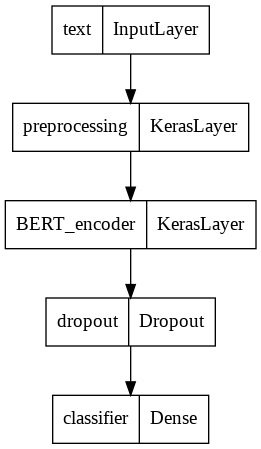

In [33]:
classifier_model = build_classifier_model()
tf.keras.utils.plot_model(classifier_model)

In [34]:
epochs = 10
steps_per_epoch = len(X_train)
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

INFO:absl:using Adamw optimizer
INFO:absl:gradient_clip_norm=1.000000


In [35]:
print(f'Training model with {tfhub_handle_encoder}')
classifier_model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=['accuracy'])
history = classifier_model.fit(X_train,Y_train,
                               validation_data=(X_test,Y_test),
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/10
547/547 [==============================] - 273s 482ms/step - loss: 1.7873 - accuracy: 0.1980 - val_loss: 1.6228 - val_accuracy: 0.2373
Epoch 2/10
547/547 [==============================] - 263s 480ms/step - loss: 1.6154 - accuracy: 0.2569 - val_loss: 1.5305 - val_accuracy: 0.3031
Epoch 3/10
547/547 [==============================] - 263s 481ms/step - loss: 1.5280 - accuracy: 0.3083 - val_loss: 1.4255 - val_accuracy: 0.3508
Epoch 4/10
547/547 [==============================] - 261s 478ms/step - loss: 1.4215 - accuracy: 0.3618 - val_loss: 1.3231 - val_accuracy: 0.4115
Epoch 5/10
547/547 [==============================] - 261s 478ms/step - loss: 1.3135 - accuracy: 0.4236 - val_loss: 1.2419 - val_accuracy: 0.4497
Epoch 6/10
547/547 [==============================] - 262s 480ms/step - loss: 1.2291 - accuracy: 0.4647 - val_loss: 1.1795 - val_accuracy: 0.4893
Epoch 7/10
547/547 [============

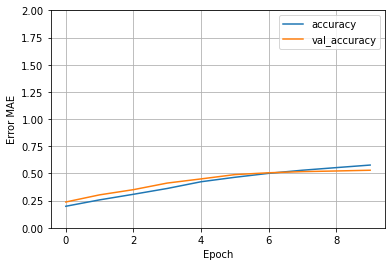

In [36]:
#plot the history
def plot_loss(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim([0, 2.0])
  plt.xlabel('Epoch')
  plt.ylabel('Error MAE')
  plt.legend()
  plt.grid(True)

plot_loss(history)#plot the history


In [37]:
#calculate the precision,recall,f1 score,confusion matrix for the model
from sklearn.metrics import f1_score,recall_score,precision_score,ConfusionMatrixDisplay

In [38]:
Y_preds = classifier_model.predict(X_test)
print(Y_preds.shape)

(7500, 5)


In [39]:
Y_preds_single = np.argmax(Y_preds,axis=1)
Y_real = np.argmax(Y_test,axis=1)

In [40]:
#plot the f1 score the model across different classes
f1 = f1_score(Y_real,Y_preds_single,average=None)
recall = recall_score(Y_real,Y_preds_single,average=None)
precision = precision_score(Y_real,Y_preds_single,average=None)

In [41]:
print("Weighted F1 Score : ",f1_score(Y_real,Y_preds_single,average="weighted"))
print("Weighted Recall Score : ",recall_score(Y_real,Y_preds_single,average="weighted"))
print("Weighted Precision Score : ",precision_score(Y_real,Y_preds_single,average="weighted"))

Weighted F1 Score :  0.5260745969717282
Weighted Recall Score :  0.5294666666666666
Weighted Precision Score :  0.5283428387573701


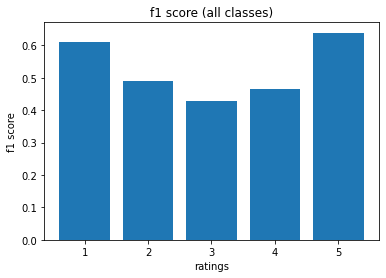

In [42]:
#plot the f1 score
x = [1,2,3,4,5]
plt.bar(x,f1,label='f1 score')
plt.title('f1 score (all classes)')
plt.xlabel('ratings')
plt.ylabel('f1 score')
plt.show()

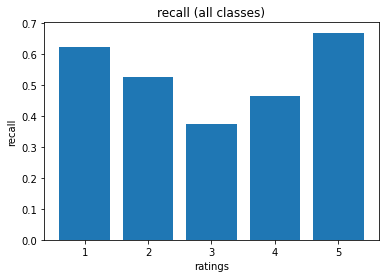

In [43]:
#plot the recall
x = [1,2,3,4,5]
plt.bar(x,recall,label='recall')
plt.title('recall (all classes)')
plt.xlabel('ratings')
plt.ylabel('recall')
plt.show()

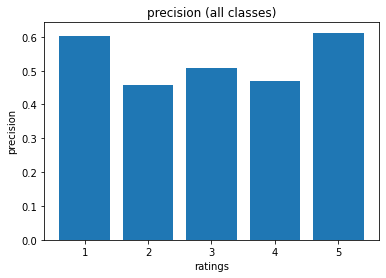

In [44]:
#precision
x = [1,2,3,4,5]
plt.bar(x,precision,label='precision')
plt.title('precision (all classes)')
plt.xlabel('ratings')
plt.ylabel('precision')
plt.show()

In [45]:
#output the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_real,Y_preds_single)
print(cm)

[[924 389  61  57  53]
 [371 817 207 110  46]
 [137 386 564 308 116]
 [ 53 128 236 703 395]
 [ 52  63  44 317 963]]


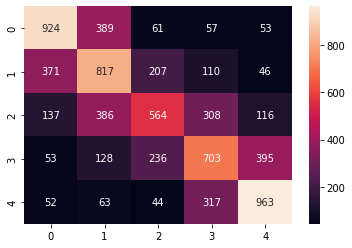

In [46]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='g')

In [47]:
#function to test our own statements
import re

values = X_test[:3]
print(values)
preds = classifier_model.predict(values)
print("the number of stars in the process = ",np.argmax(preds,axis=1)+1)
    

['the next day du pur bowie br  pas vraiment de surprise br  fait pour les fans de la premi egrave re heure br  agrave  consommer sans mod eacute ration br  je conseille  agrave  tout public '
 ' fun  typicament britanique très british    j ai vu en vo car je suis anglais  le type de film qui montre pourquoi l industrie des films britannique vaux bien continuer  egalement bien que the full monty et vera drake   le police anglais comme jamais vu  un petit village a la campagne recevoir un nouveau policier  simon pegg  trop bien  pour ces collèges londoniens a du mal  à travailler dans cet endroit calme  mais il y a quelque chose qui ne va pas    hilarant mélange  un coup d œil sur les policiers de usa  hommage britannique a point break et tout ce genre de films '
 'for the completist only i have over 20 cds of live music from yes  no bootlegs  and a few solo live performances from steve howe  i was intrigued by this release to see what benoit david could do  unfortunately  he is so like